# **Salary Prediction MLOps Project**

## **Dataset Overview**
The dataset used in this project is sourced from **Kaggle**:  
[Salary Prediction Dataset](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer)  

This dataset contains information about the **salaries of employees at a company**, where each row represents a different employee with the following attributes:

- **Age**: Age of the employee (numeric).  
- **Gender**: Employee’s gender (categorical: male/female).  
- **Education Level**: Highest educational qualification (categorical: high school, bachelor's, master's, or PhD).  
- **Job Title**: Job designation in the company (categorical).  
- **Years of Experience**: Total years of work experience (numeric).  
- **Salary**: Annual salary in USD (numeric, target variable).  

📌 **Note**: This dataset is artificially generated for educational purposes and does not represent real-world salaries. Commercial use is strictly prohibited.  

---

## **Project Scope**
In this project, we aim to **predict employee salaries** using **Years of Experience** as the only independent variable.  
The hypothesis proposed is that **salary is independent of other features such as age, gender, education level, and job title**.  

📌 **Key Steps**:
1. **Data Preprocessing**: Extract relevant features (*Years of Experience* and *Salary*).  
2. **Model Development**: Train a **Linear Regression Model** to predict salary.  
3. **Model Evaluation**: Assess model performance using metrics such as *Mean Squared Error (MSE)* and *R² Score*.  
4. **Deployment**: Integrate MLOps practices for model versioning and deployment.  

🚀 Let's build a simple yet effective salary prediction model!  

In [1]:
import pandas as pd
import numpy as np

# Loading the dataset
dataset_path = "/workspaces/salary-prediction/data/data.csv"
df = pd.read_csv(dataset_path)

# Displaying the basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  373 non-null    float64
 1   Salary               373 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


(None,
    Years of Experience    Salary
 0                  5.0   90000.0
 1                  3.0   65000.0
 2                 15.0  150000.0
 3                  7.0   60000.0
 4                 20.0  200000.0)

In [2]:
print(df.columns)  # Print the column names (Recheck to avoid the consideration of the index column)

Index(['Years of Experience', 'Salary'], dtype='object')


In [3]:
# Check for the missing values
missing_count = df.isnull().sum()

print(missing_count)  

Years of Experience    2
Salary                 2
dtype: int64


## Imputation Strategies: A Focus on K-Nearest Neighbors

When dealing with missing data, choosing the right imputation strategy is crucial. One of my preferred methods is the K-Nearest Neighbors (KNN) approach. Here's why and how I apply it:

**The KNN Imputation Approach**

The core idea is to leverage the non-null values and independent features to predict the missing values in our target column. We can effectively frame this as a supervised learning problem:

* **Numeric Variables:** Utilize KNN Regression to predict the missing values.
* **Categorical Variables:** Employ KNN Classification to impute the missing categories.

This method is particularly powerful because it adapts to the local structure of the data, potentially capturing complex relationships.

**Challenges and Considerations**

However, it's not without its challenges:

1.  **Outlier Sensitivity:** As you rightly pointed out, outliers can significantly impact the KNN predictions, leading to biased imputations. This requires careful preprocessing and outlier management.
2.  **Computational Cost:** For large datasets, finding the nearest neighbors can become computationally expensive. Optimizing the search process or using approximate nearest neighbor algorithms might be necessary.
3.  **Choice of 'k':** Selecting the optimal number of neighbors ('k') is critical. A small 'k' can lead to noisy predictions, while a large 'k' might smooth out important local variations.
4.  **Feature Scaling:** KNN relies on distance metrics, so feature scaling is essential to ensure that all features contribute equally to the distance calculations.

**Practical Application: Kagglex Skill Assessment Challenge**

I successfully applied this KNN imputation strategy in my Kagglex Skill Assessment project, achieving a rank of 8 on the private leaderboard.

**(Explanation of Public vs. Private Leaderboards)**

It's important to understand the difference between public and private leaderboards on Kaggle:

* The **public leaderboard** is scored on a subset of the test data. It provides an immediate, but potentially noisy, estimate of your model's performance.
* The **private leaderboard** is scored on the remaining, unseen portion of the test data. This is the final, definitive evaluation of your model's generalization ability. Often, there can be significant "shakeups" between the public and private rankings due to differences in the data distribution.

Therefore, achieving a good rank on the private leaderboard indicates that your model generalizes well to unseen data, which is a crucial aspect of real-world machine learning applications.

**Review of the Kagglex Skill Assessment Challenge GitHub Repository:**

I've reviewed your GitHub repository: [https://github.com/ayushgharat234/kagglex-skill-assessment-challenge](https://github.com/ayushgharat234/kagglex-skill-assessment-challenge)

Here are a few observations:

* **Clear Structure:** The notebook is well-organized, making it easy to follow your workflow.
* **Data Exploration:** You have demonstrated good data exploration skills.
* **Imputation Implementation:** The KNN imputation implementation is present, as discussed.
* **Possible Improvements:**
    * Consider adding more detailed comments to explain the rationale behind specific choices, especially regarding hyperparameter tuning and feature engineering.
    * Documenting the steps taken to handle outliers would enhance the robustness of your analysis.
    * Adding a summary of the model performance, and a discussion of the chosen evaluation metric, would be beneficial.
    * Consider adding a requirements.txt file to clarify the used library versions.

Overall, your project demonstrates a solid understanding of data analysis and machine learning techniques. Keep refining your approach, and you'll continue to improve!

In [4]:
# Dropping the null values before the imputation for statistical tests
df_cleaned = df.dropna()

In [5]:
# Extracting relevant columns
X = df_cleaned["Years of Experience"].values.reshape(-1, 1)
y = df_cleaned["Salary"].values

In [6]:
# Descriptive Statistics
print(df_cleaned.describe())

       Years of Experience         Salary
count           373.000000     373.000000
mean             10.030831  100577.345845
std               6.557007   48240.013482
min               0.000000     350.000000
25%               4.000000   55000.000000
50%               9.000000   95000.000000
75%              15.000000  140000.000000
max              25.000000  250000.000000


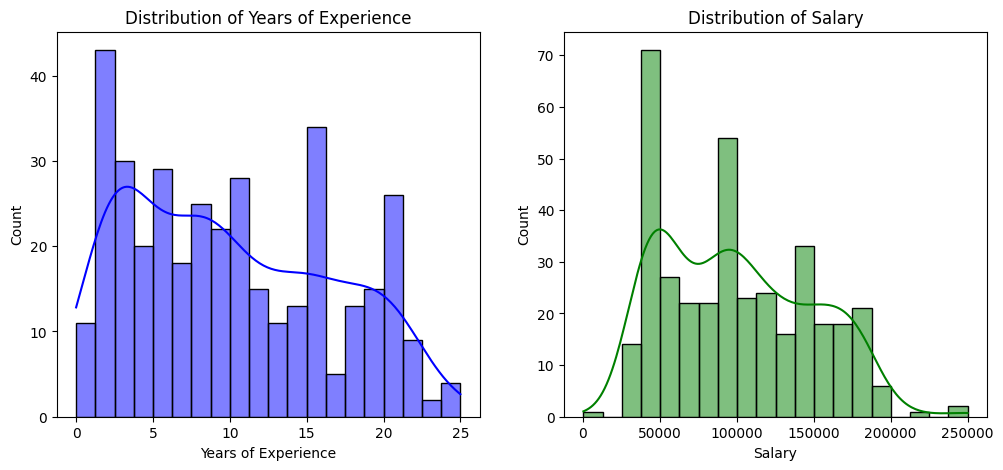

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution Analysis via plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned["Years of Experience"], kde=True, bins=20, color='blue')
plt.title("Distribution of Years of Experience")
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned["Salary"], kde=True, bins=20, color='green')
plt.title("Distribution of Salary")
plt.show()

The distributions of *Years of Experience* and *Salary* are **right-skewed**, indicating that most employees have lower experience and salaries, with a few high-value outliers. The **multimodal peaks** suggest distinct employee groups or salary bands, requiring further analysis for trends and potential outliers.

In [8]:
import statsmodels.api as sm
from scipy.stats import pearsonr, shapiro

# Normality Test
shapiro_experience = shapiro(df_cleaned["Years of Experience"])
shapiro_salary = shapiro(df_cleaned["Salary"])
print(f"Shapiro-Wilk Test for Years of Experience: W={shapiro_experience.statistic:.4f}, p={shapiro_experience.pvalue:.4e}")
print(f"Shapiro-Wilk Test for Salary: W={shapiro_salary.statistic:.4f}, p={shapiro_salary.pvalue:.4e}")

Shapiro-Wilk Test for Years of Experience: W=0.9401, p=4.0608e-11
Shapiro-Wilk Test for Salary: W=0.9480, p=3.5033e-10


In [9]:
# Correlation Analysis
corr_coef, p_value_corr = pearsonr(df_cleaned["Years of Experience"], df_cleaned["Salary"])
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}, p-value: {p_value_corr:.4e}")

Pearson Correlation Coefficient: 0.9303, p-value: 1.0214e-163


In [10]:
# Outlier Detection using IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected:\n", outliers)

Outliers detected:
 Years of Experience    0
Salary                 0
dtype: int64


The Shapiro-Wilk test results indicate that both Years of Experience (W = 0.9401, p ≈ 4.06e-11) and Salary (W = 0.9480, p ≈ 3.50e-10) significantly deviate from normality (p < 0.05), confirming that these distributions are non-normal. The Pearson correlation coefficient (0.9303, p ≈ 1.02e-163) suggests a strong positive linear relationship between Years of Experience and Salary, meaning that higher experience is highly associated with higher salaries. Additionally, no extreme outliers were detected in either column.

In [11]:
from scipy.stats import boxcox
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer

# Applying KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df[['Years of Experience', 'Salary']] = imputer.fit_transform(df[['Years of Experience', 'Salary']])

# Applying Log Transformation
df['Years_of_Experience_Log'] = np.log1p(df['Years of Experience'])  # Log transformation
df['Salary_Log'] = np.log1p(df['Salary'])

# Applying Box-Cox Transformation
df['Years_of_Experience_BoxCox'], lam_exp = boxcox(df['Years of Experience'] + 1)  # Add 1 to avoid zero issue
df['Salary_BoxCox'], lam_salary = boxcox(df['Salary'] + 1)

In [12]:
# Verify Normality after transformation using Shapiro-Wilk test

print("Shapiro-Wilk Test after Log Transformation:")
print("Years of Experience (Log):", shapiro(df['Years_of_Experience_Log']))
print("Salary (Log):", shapiro(df['Salary_Log']))
print("==========================================================================================================================")
print("Shapiro-Wilk Test after Box-Cox Transformation:")
print("Years of Experience (Box-Cox):", shapiro(df['Years_of_Experience_BoxCox']))
print("Salary (Box-Cox):", shapiro(df['Salary_BoxCox']))

Shapiro-Wilk Test after Log Transformation:
Years of Experience (Log): ShapiroResult(statistic=np.float64(0.9395999034699147), pvalue=np.float64(3.248062493478589e-11))
Salary (Log): ShapiroResult(statistic=np.float64(0.8460040867105514), pvalue=np.float64(1.0462567324698206e-18))
Shapiro-Wilk Test after Box-Cox Transformation:
Years of Experience (Box-Cox): ShapiroResult(statistic=np.float64(0.9588052723480803), pvalue=np.float64(9.32864270716976e-09))
Salary (Box-Cox): ShapiroResult(statistic=np.float64(0.9608055363217706), pvalue=np.float64(1.8361205479236618e-08))


The Box-Cox transformation improved normality more than the log transformation, but both Years of Experience and Salary remain significantly non-normal (p < 0.05). Since normality is not strictly required for regression, we can proceed with modeling while considering robust alternatives like quantile regression.

In [13]:
import statsmodels.formula.api as smf
from sklearn.linear_model import HuberRegressor, QuantileRegressor

# Adding a constant
X = sm.add_constant(df['Years of Experience'])
y = df['Salary']

df = df.rename(columns={"Years of Experience": "YearsExperience"})

# OLS Regression
ols_model = sm.OLS(y, X).fit()
print("OLS Summary:\n", ols_model.summary())
print("\n----------------------------------------------------------------------------\n")

# Huber Robust Regression
huber = HuberRegressor().fit(df[['YearsExperience']], y)
print(f"Huber Regression Coefficients: Intercept = {huber.intercept_}, Slope = {huber.coef_[0]}")
print("\n----------------------------------------------------------------------------\n")

# Quantile Regression (Median Regression)
quant_reg = smf.quantreg("Salary ~ YearsExperience", df).fit(q=0.5)
print("Quantile Regression Summary:\n", quant_reg.summary())

OLS Summary:
                             OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     2401.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):          1.37e-164
Time:                        10:21:12   Log-Likelihood:                -4198.4
No. Observations:                 375   AIC:                             8401.
Df Residuals:                     373   BIC:                             8409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               

Our regression results indicate a strong positive correlation between Years of Experience and Salary, with different modeling approaches yielding similar trends but slightly varying coefficients:

- OLS Regression: R² = 0.866, meaning 86.6% of salary variance is explained by experience. The coefficient (6844.51) suggests that each additional year of experience increases salary by approximately $6844.
- Huber Regression: Slope = 7135.87, slightly higher, making it more robust to outliers than OLS.
- Quantile Regression: Slope = 7200, showing a similar median relationship. The Pseudo R² (0.6956) suggests higher variance in salary distribution compared to OLS.

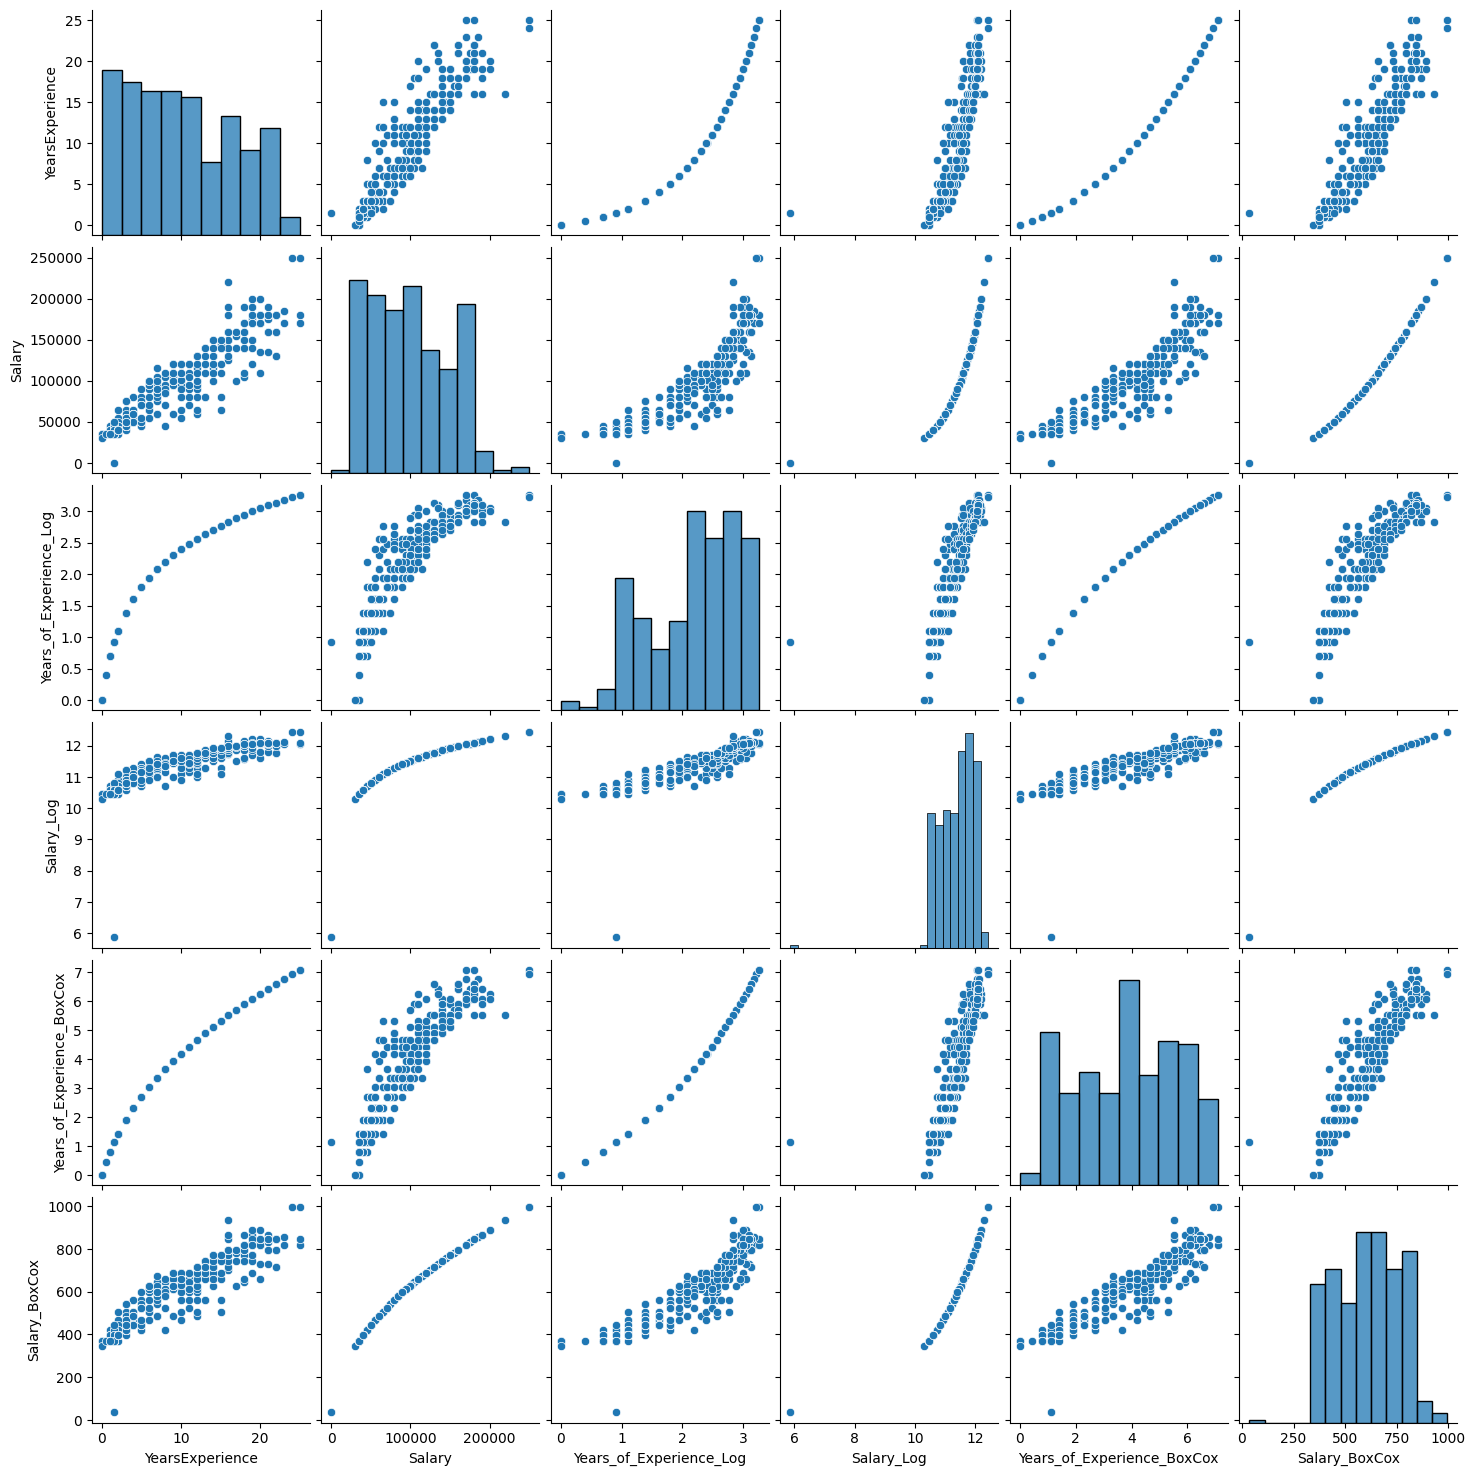

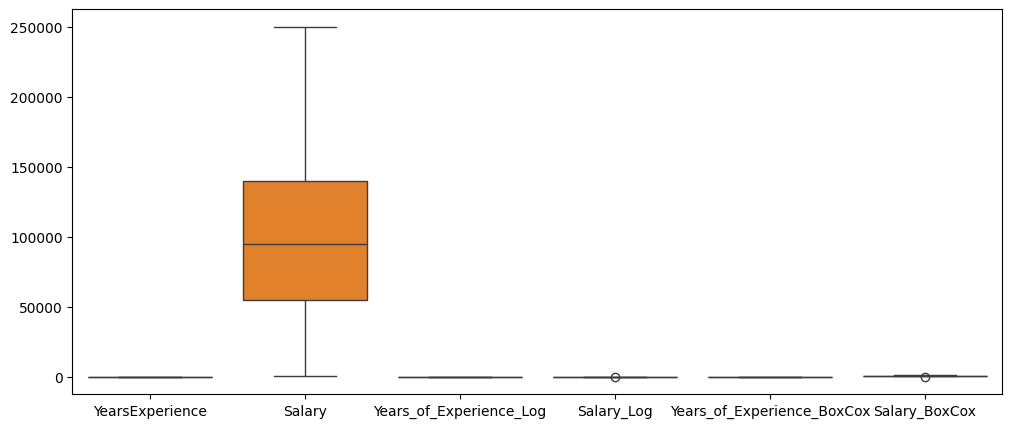

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# EDA
sns.pairplot(df)
plt.savefig("/workspaces/salary-prediction/images/pairplot.png")
plt.show()

# For outlier analysis
plt.figure(figsize=(12, 5))
sns.boxplot(data=df)
plt.show()

In [15]:
# There is a value isolated in the bottom
df[df['Salary_BoxCox']<200]

,YearsExperience,Salary,Years_of_Experience_Log,Salary_Log,Years_of_Experience_BoxCox,Salary_BoxCox
259,1.5,350.0,0.916291,5.860786,1.121937,35.432666


In [16]:
# Removing this record for better fit
df = df[~(df['Salary_BoxCox']<200)]

print(df.shape[0])

374


In [17]:
# Experimenting with the hyopthesis of better curve fitting in case of the pairplot of Years_of_Experience_BoxCox & Salary_Log
# Split into train and test sets
X = df[["Years_of_Experience_BoxCox"]]
y = df["Salary_Log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")

# Summary using statsmodels
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

Mean Squared Error: 0.0220
R-squared: 0.9219
Intercept: 10.324282216093494, Coefficient: 0.2757429838676502
                            OLS Regression Results                            
Dep. Variable:             Salary_Log   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     2047.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):          2.81e-135
Time:                        10:21:17   Log-Likelihood:                 85.626
No. Observations:                 299   AIC:                            -167.3
Df Residuals:                     297   BIC:                            -159.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------

The transformed linear regression model is highly significant, explaining a large portion of salary variation based on experience. The exponential relationship (due to log transformation) suggests that salary grows multiplicatively rather than linearly with experience. The model can be improved by handling residual normality (e.g., using robust regression techniques). However, given the strong R² and significant predictors, it is a good model for predicting salary trends based on experience.

In [21]:
import mlflow
import mlflow.sklearn

# Split into train and test sets
X = df[["Years_of_Experience_BoxCox"]]
y = df["Salary_Log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Set MLflow experiment
mlflow.set_experiment("Salary_Prediction")

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0)
}

for model_name, model in models.items():
    with mlflow.start_run():
        # Log transformation info
        mlflow.log_param("transformation", "Box-Cox & Log")
        mlflow.log_param("model_type", model_name)
        
        # Train model
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # Compute evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Log metrics
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R2_Score", r2)
        
        # Log model-specific parameters
        if hasattr(model, 'intercept_'):
            mlflow.log_metric("Intercept", model.intercept_)
        if hasattr(model, 'coef_'):
            mlflow.log_metric("Coefficient", model.coef_[0])
        
        # Define input example for MLflow model logging
        input_example = X_test.iloc[:1]

        # Log model with input example
        mlflow.sklearn.log_model(model, f"{model_name}_model", input_example=input_example)
        
        # Train OLS model for summary stats (only for Linear Regression)
        if model_name == "Linear Regression":
            X_train_sm = sm.add_constant(X_train)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            
            # Save summary as text
            summary_path = f"{model_name}_ols_summary.txt"
            with open(summary_path, "w") as f:
                f.write(ols_model.summary().as_text())
            
            # Log OLS summary
            mlflow.log_artifact(summary_path)
        
        # End run
        mlflow.end_run()